## Laboratorio N-1 de RF y Microondas

Por: Neyra Poveda y Leo Giurdanella

## Paso 1
### Se crean las 3 señales con las siguientes especificaciones:
1. Señal 1 = frecuencia 1000 Hz
2. Señal 2 = frecuencia 2000 Hz
3. Señal 3 = frecuencia 3000 Hz
4. Señal 4 = suma de las 3 señales 

In [213]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write

fs = 6500 # Frecuencia de muestreo
f1 = 1000 # 0.1Hz # Frecuencia señal 1
f2 = 2000 # 0.2Hz # Frecuencia señal 2
f3 = 3000 # 0.3Hz # Frecuencia señal 3
duracion = 0.5 #duración

N= duracion*fs #cantidad de puntos, recordar que t=nTs cuando se pasa de continuo a discreto  
t = np.linspace(0,duracion,int(N+1)) #vector de tiempo t, entre 0-duration;

y1 = np.cos(f1*2*np.pi*t)
y2 = np.cos(f2*2*np.pi*t)
y3 = np.cos(f3*2*np.pi*t)

y = y1 + y2 + y3 # Sumatoria de las 3 señales con distinta frecuencia.


## Paso 2
### Se visualizan las 3 señales y la señal producto de la suma de las 3

Para mejor visualización sólo se muestra en la gráfica un tramo de las señales.


(0, 0.05)

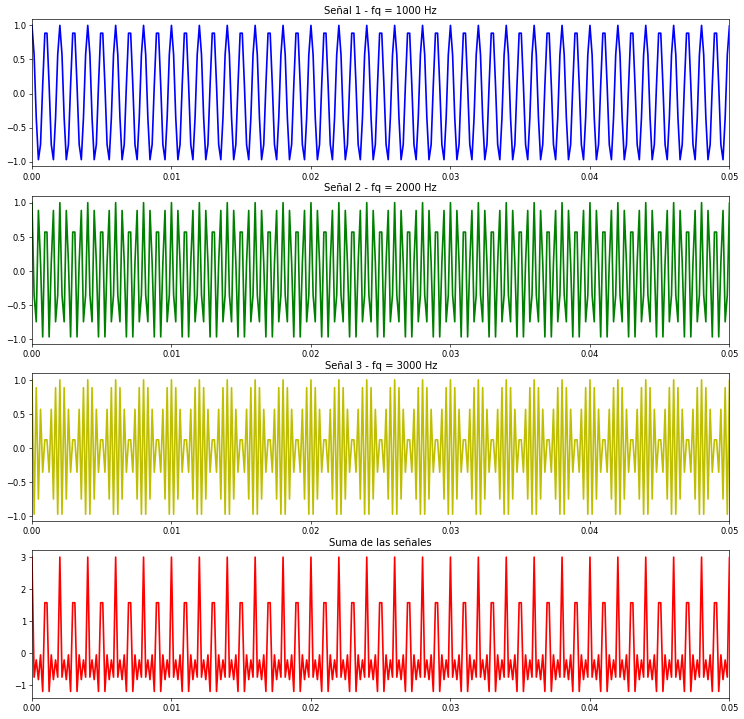

In [178]:
plt.figure(figsize=(15, 15), dpi= 60, facecolor='w', edgecolor='k')
# Subplot 1
plt.subplot(4, 1, 1) # Los argumentos son: Nro filas, Nro columnas, índice de la subfigura
plt.plot(t, y1, color='b', lw=2)
plt.title('Señal 1 - fq = 1000 Hz')
plt.xlim(0,0.05)
# Subplot 2
plt.subplot(4, 1, 2) 
plt.plot(t, y2, color='g', lw=2)
plt.title('Señal 2 - fq = 2000 Hz')
plt.xlim(0,0.05)
# Subplot 3
plt.subplot(4, 1, 3)
plt.plot(t, y3, color='y', lw=2)
plt.title('Señal 3 - fq = 3000 Hz')
plt.xlim(0,0.05)
# Subplot 4
plt.subplot(4, 1, 4)
plt.plot(t, y, color='r', lw=2)
plt.title('Suma de las señales')
plt.xlim(0,0.05)

## Paso 3
### Reproducción del sonido 
En este paso se reproduce el sonido de las señal resultante de la suma de las 3 señales.

In [257]:
import pyaudio
import numpy as np

p = pyaudio.PyAudio()
volume = 0.5     # rango [0.0, 1.0]
stream = p.open(format=pyaudio.paFloat32,
                channels=1,
                rate=fs,
                output=True)
# play. 
stream.write(volume*(y))
stream.stop_stream()
stream.close()
p.terminate()


## Paso 4
### Cálculo de la transformada de Fourier 
La transformada de fourier permitirá ver las componentes de frecuencia que componen la señal obtenida de la suma de las 3 señales.

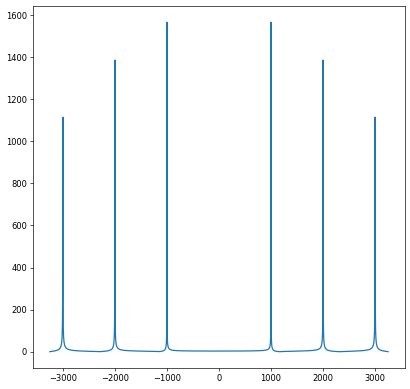

In [189]:
 
X = np.fft.fft(y)
XX = np.fft.fftshift(X)
X = abs(XX)
angle = np.angle(XX)
Df = fs/len(y)
f = np.linspace((-len(y)/2)*Df,(len(y)/2)*Df,len(y))

### Gráfico

plt.figure(figsize=(8, 8), dpi= 60, facecolor='w', edgecolor='k')
plt.plot(f,X)
    

**Al calcular la transformada de fourier de la señal resultante, se puede observar las 3 componentes de frecuencia correspondientes a las frecuencias de las señales sumadas.

## Paso 5
### Filtrado
Se filtra la señal mostrada en la imagen anterior para recuperar una sola componente de frecuencia.
El filtro a utilizar permitirá recuperar una señal con la frecuencia de 2000 Hz solamente.
Para esto, se utilizará un filtro pasa banda, debido a que la frecuencia de 2000 Hz se encuentra entre las otras dos componentes de frecuencias (1000 Hz y 3000 Hz)

In [261]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

fc1 = 1500  # Frecuencia de Corte 1
fc2 = 2500  # Frecuencia de Corte 2
w1 = fc1 / (fs / 2) # Frecuencia normailizada
w2 = fc2 / (fs / 2) # Frecuencia normailizada
w = [w1, w2]
b, a = signal.butter(5, w, 'bandpass')
Y2000 = signal.filtfilt(b, a, y)



## Paso 6
### Cálculo de la Transformada de Fourier a la señal filtrada

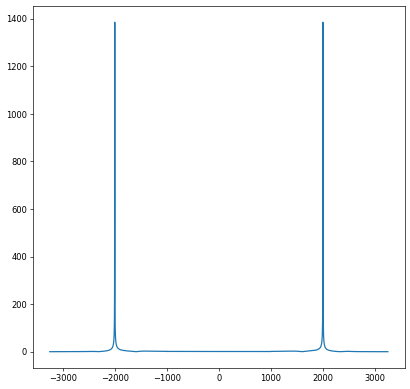

In [262]:
X = np.fft.fft(Y2000)
XX = np.fft.fftshift(X)
X = abs(XX)
angle = np.angle(XX)
Df = fs/len(Y2000)
f = np.linspace((-len(Y2000)/2)*Df,(len(Y2000)/2)*Df,len(Y2000))

### Gráfico

plt.figure(figsize=(8, 8), dpi= 60, facecolor='w', edgecolor='k')
plt.plot(f,X)

* Se puede observar que se recupereró la señal de 2000 Hz después del filtrado

## Paso 7:
### Reproducción del sonido 
En este paso se reproduce el sonido de las señal después del filtrado.

In [263]:
import pyaudio
import numpy as np

p = pyaudio.PyAudio()
volume = 0.5     # rango [0.0, 1.0]
stream = p.open(format=pyaudio.paFloat32,
                channels=1,
                rate=fs,
                output=True)
# play. 
stream.write(volume*(Y2000))
stream.stop_stream()
stream.close()
p.terminate()
